## Behavioural Finance ##

Assume Barberis, Huang, and Santos economy where investor receives utility from consumption as well as recent financial gain or loss. Use these parameters:

$$
\delta = 0.99 , \gamma  = 1 , \lambda =2
$$
Consumption growth has lognormal distribution:
$$
ln\tilde{g} = 0.02 + 0.02 \tilde{\epsilon}
$$

where $\epsilon$ is standard normal random variable. Simulate probability distribution for consumption growth with (at least) 104 random draws from standard normal distribution.

Recall consumption growth with disaster has the following distribution:
$$
ln\left(\frac{\tilde{C_1 ^*}}{C_0 ^*}\right) = \mu _c + \sigma _c \tilde{z} + \tilde{\nu}
$$
Where

* $\mu _c$  : mean of consumption growth
* $\sigma _c$   : std dev of consumption growth
* $\tilde{z}$   : normally distributed
* $\tilde{\nu}$ : represents rare disaster

With these parameters, risk-free rate is around 3% per year:

$$
    R_f = \frac{e^{0.0198}}{0.99} = 1.0303
$$
Risk free rate return is derived from the **first-order condition for optimal individual consumption** which yields:
$$
\delta = e^{-\rho} \\
R_f = e^{\rho + \gamma \mu _c - \frac{1}{2} \gamma ^2 \sigma _c^2}
$$
Where

* $\delta$  : subjective discount factor 

Define x as one plus dividend yield for market portfolio:

$$
    x = 1 + \frac{D}{P}
$$ 

Ideally, we follow lecture note,

$$
\frac{P_t}{D_t} = k \\
\kappa = \frac{1+k}{k}
$$
Where

* $\frac{P_t}{D_t}$  : price-dividend ratio

and define error term:
$$
e(x) = 0.99 b_0 E[v(x\tilde{g})] + 0.99x - 1
$$

or if we follow lecture note, , **the equilibrium condition for price-dividend ratio of market portfolio (rearrange to get error like above):**
$$
\delta b_0 E_t[v(\kappa e^{\mu _c + \sigma _c \epsilon _{t+1}})] + 
\delta \kappa e^{(1-\gamma)\mu + \frac{1}{2}(1-\gamma) ^2 \sigma ^2} = 1
$$

where utility from recent financial gain or loss is given by:
$$
v(R) = R - R_f, R \geq R_f\\
v(R) = \lambda (R- R_f), R < R_f

$$
Solve for e(x) = 0 to find equilibrium value of x

* Calculate price-dividend ratio for market portfolio. Plot price-dividend ratio (on vertical axis) vs b0:
$$
\frac{P}{D} = \frac{1}{x-1}
$$ 
 


* Calculate expected market return. Plot equity premium (on vertical axis) vs b0:
$$
E[\tilde{R_m}] = E(x\tilde{g}) = xe^{0.0202} \\
E_t[R_{t+1}] = \kappa E_t(e^{\mu + \sigma \epsilon _{t+1}}) = \kappa e ^{\mu + \frac{1}{2}\sigma^2}
$$

* Briefly explain main characteristics of v(∙) (which is utility function to measure utility from recent financial gain or loss), as well as economic significance of b0 and λ.


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import typing

In [2]:
# setup params : thank you eko
no_of_draws = 100000
my_delta = 0.99
my_gamma = 1
my_lambda = 2
my_rho = -np.log(my_delta)
my_consumption_mu = 0.02
my_consumption_sigma = 0.02

R_f = np.exp(
    my_rho
    + my_gamma * my_consumption_mu
    - 0.5 * (my_gamma**2) * (my_consumption_sigma**2)
)
R_f

1.0303003233953707

In [3]:
epsilon = np.random.standard_normal(no_of_draws)
epsilon

array([ 2.27870439, -0.23752349,  0.20982582, ...,  1.24017459,
        0.72460785, -0.44033028])

In [4]:
g = np.exp(my_consumption_mu + my_consumption_sigma * epsilon)
g

array([1.06777184, 1.0153664 , 1.02449163, ..., 1.04582233, 1.03509391,
       1.01125627])

In [5]:
b_0 = np.arange(0, 10.1, 0.1)
b_0

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

Define error term
$$e(x) = 0.99b_0E[v(x\tilde{g})]+0.99x -1$$

where 
$$v(R) = r - 1.0303 ; R\geq 1.0303$$
$$v(R) = 2(r - 1.0303) ; R < 1.0303$$
$$ R_f \approx 1.0303$$
solve to minimize e(x)

In [6]:
err_tolerance = 1e-5

In [7]:
def utility(r, R_f):
    if r >= R_f:
        utility = r - R_f
    else:
        utility = my_lambda * (r - R_f)
    return utility

In [8]:
# wah thank you eko
def kappa_numerical_error(
    delta: float,
    b_0: float,
    consumption_growth: float,
    gamma: float,
    mu: float,
    sigma: float,
    kappa: float,
) -> float:
    expected_utility = np.mean([utility(i * kappa, R_f) for i in consumption_growth])
    first_term = delta * b_0 * expected_utility
    second_term = (
        delta * kappa * np.exp((1 - gamma) * mu + 0.5 * (1 - gamma) ** 2 * sigma**2)
    )
    third_term = -1
    return first_term + second_term + third_term

In [9]:
# should we implement our own bisection search ?
def bisect_x(x_lower, x_upper, b, g):
    x_0 = (x_lower + x_upper) / 2
    error = kappa_numerical_error(
        my_delta, b, g, my_gamma, my_consumption_mu, my_consumption_sigma, x_0
    )
    if np.abs(error) <= err_tolerance:
        return x_0
    else:
        if (error > 0) and (np.abs(error) > err_tolerance):
            x_0 = bisect_x(x_lower, x_0, b, g)
        elif (error < 0) and (np.abs(error) > err_tolerance):
            x_0 = bisect_x(x_0, x_upper, b, g)
    return x_0

In [10]:
possible_x = []
x_lower = 1
x_upper = 1.1
for b in b_0:
    my_x = bisect_x(x_lower, x_upper, b, g)
    possible_x.append(my_x)
print(possible_x)

[1.010107421875, 1.0107666015624996, 1.01126708984375, 1.011669921875, 1.0119873046875, 1.01226806640625, 1.0124938964843748, 1.0126953125, 1.0128662109374997, 1.0130126953124998, 1.0131408691406247, 1.0132568359374998, 1.0133666992187498, 1.013458251953125, 1.013543701171875, 1.013623046875, 1.0136901855468752, 1.0137573242187499, 1.013818359375, 1.0138732910156252, 1.013922119140625, 1.013970947265625, 1.0140136718750001, 1.0140563964843752, 1.014093017578125, 1.014129638671875, 1.014166259765625, 1.0141967773437501, 1.0142272949218754, 1.0142547607421877, 1.0142822265625, 1.014306640625, 1.0143310546875002, 1.0143554687500003, 1.014376831054688, 1.014398193359375, 1.0144195556640627, 1.0144378662109377, 1.0144561767578126, 1.0144744873046878, 1.01448974609375, 1.0145050048828126, 1.014520263671875, 1.0145355224609376, 1.01455078125, 1.0145629882812501, 1.0145767211914065, 1.0145904541015625, 1.0146026611328125, 1.0146133422851564, 1.0146240234375, 1.01463623046875, 1.014645385742187

In [11]:
# using function
possible_return = list(
    map(
        lambda x: x
        * np.exp(my_consumption_mu + (0.5 * np.power(my_consumption_sigma, 2))),
        possible_x,
    )
)
print(possible_return)

[1.0307190685685532, 1.0313916990817098, 1.0319024000268846, 1.0323134520071473, 1.0326373111431117, 1.032923801917234, 1.0331542401485931, 1.0333597661387246, 1.0335341518273204, 1.0336836252746888, 1.0338144145411359, 1.033932747686969, 1.034044852772495, 1.0341382736771005, 1.0342254665213986, 1.0343064313053898, 1.034374939968767, 1.0344434486321437, 1.034505729235214, 1.034561781777977, 1.034611606260433, 1.0346614307428892, 1.0347050271650382, 1.0347486235871874, 1.0347859919490294, 1.0348233603108714, 1.0348607286727132, 1.0348918689742486, 1.0349230092757837, 1.0349510355471652, 1.0349790618185466, 1.0350039740597747, 1.0350288863010029, 1.0350537985422308, 1.0350755967533056, 1.0350973949643798, 1.0351191931754544, 1.0351378773563753, 1.0351565615372964, 1.0351752457182175, 1.0351908158689849, 1.0352063860197525, 1.0352219561705198, 1.0352375263212874, 1.035253096472055, 1.035265552592669, 1.03527956572836, 1.0352935788640503, 1.0353060349846643, 1.035316934090202, 1.035327833

In [12]:
possible_return_expectation = list(
    map(
        lambda x: np.mean(x * g),
        possible_x,
    )
)
print(possible_return_expectation)

[1.030767746690568, 1.0314404089702758, 1.0319511340344991, 1.032362205427654, 1.0326860798586246, 1.0329725841629447, 1.0332030332772892, 1.0334085689738668, 1.0335829628982354, 1.0337324434048372, 1.0338632388481137, 1.033981577582507, 1.0340936879624583, 1.0341871132790845, 1.034274310241269, 1.0343552788490116, 1.034423790747871, 1.0344923026467294, 1.0345545861911472, 1.0346106413811234, 1.0346604682166567, 1.034710295052191, 1.0347538935332834, 1.0347974920143754, 1.0348348621410257, 1.0348722322676762, 1.0349096023943267, 1.0349407441665357, 1.0349718859387445, 1.0349999135337322, 1.0350279411287198, 1.0350528545464868, 1.0350777679642538, 1.0351026813820212, 1.035124480622567, 1.0351462798631128, 1.035168079103659, 1.0351867641669843, 1.0352054492303095, 1.035224134293635, 1.035239705179739, 1.0352552760658436, 1.035270846951948, 1.0352864178380523, 1.0353019887241564, 1.03531444543304, 1.035328459230534, 1.0353424730280276, 1.0353549297369113, 1.0353658293571844, 1.03537672897

In [13]:
df = pd.DataFrame(
    list(zip(b_0, possible_x, possible_return, possible_return_expectation)),
    columns=("b", "x", "exp_return", "exp_return_exp"),
)
df["pd_ratio"] = 1 / (df["x"] - 1)
df

,b,x,exp_return,exp_return_exp,pd_ratio
0,0.0,1.010107,1.030719,1.030768,98.937198
1,0.1,1.010767,1.031392,1.031440,92.879819
2,0.2,1.011267,1.031902,1.031951,88.754063
3,0.3,1.011670,1.032313,1.032362,85.690377
4,0.4,1.011987,1.032637,1.032686,83.421589
...,...,...,...,...,...
96,9.6,1.014908,1.035617,1.035666,67.078813
97,9.7,1.014911,1.035621,1.035669,67.065084
98,9.8,1.014915,1.035624,1.035673,67.047931
99,9.9,1.014919,1.035628,1.035677,67.030787


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


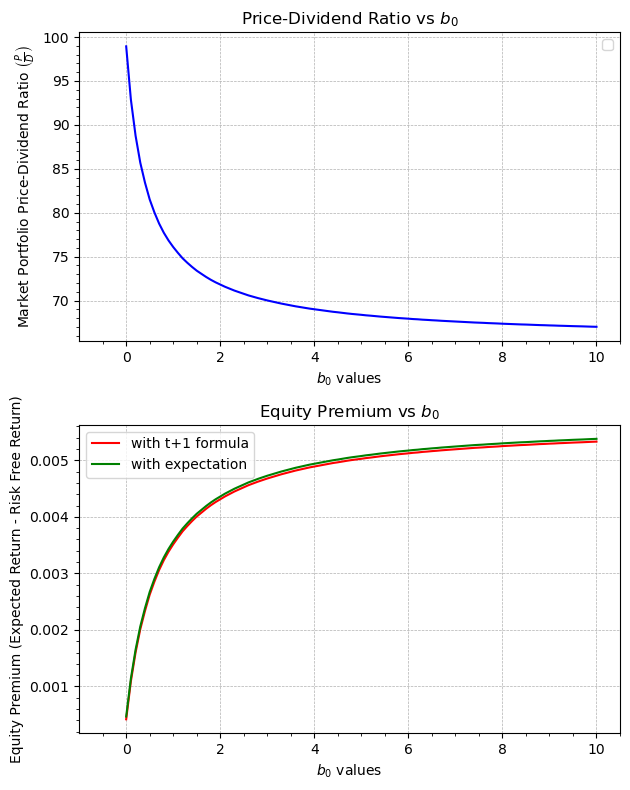

In [14]:
f0, ax0 = plt.subplots(2, 1)
f0.set_figheight(8)
ax0[0].plot(df["b"], df["pd_ratio"], color="blue")
ax0[0].xaxis.set_major_locator(ticker.AutoLocator())
ax0[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0[0].yaxis.set_major_locator(ticker.AutoLocator())
ax0[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0[0].set_xlim(-1)
ax0[0].set_xlabel(r"$b_0$ values")
ax0[0].set_ylabel(r"Market Portfolio Price-Dividend Ratio $\left(\frac{P}{D}\right)$")
ax0[0].grid(linestyle="--", linewidth=0.5)
ax0[0].legend()
ax0[0].set_title(r"Price-Dividend Ratio vs $b_0$")

ax0[1].plot(df["b"], df["exp_return"] - R_f, color="red", label="with t+1 formula")
ax0[1].plot(
    df["b"], df["exp_return_exp"] - R_f, color="green", label="with expectation"
)
ax0[1].xaxis.set_major_locator(ticker.AutoLocator())
ax0[1].xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0[1].yaxis.set_major_locator(ticker.AutoLocator())
ax0[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0[1].set_xlim(-1)
ax0[1].set_xlabel(r"$b_0$ values")
ax0[1].set_ylabel(r"Equity Premium (Expected Return - Risk Free Return)")
ax0[1].grid(linestyle="--", linewidth=0.5)
ax0[1].legend()
ax0[1].set_title(r"Equity Premium vs $b_0$")


f0.tight_layout()
plt.show(f0)
f0.savefig("f0.jpg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


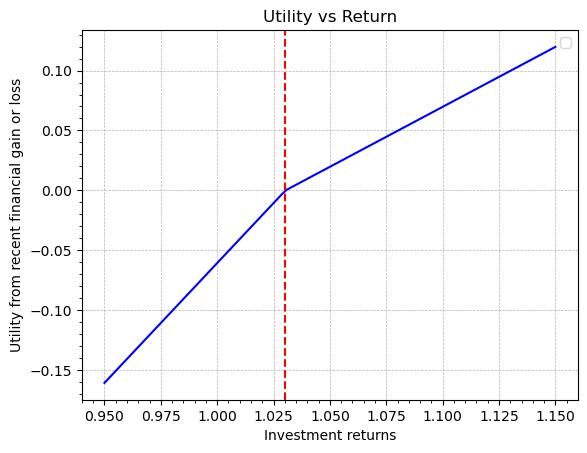

In [15]:
r = np.linspace(0.95, 1.15, 100)
u = [utility(i, R_f) for i in r]
f0, ax0 = plt.subplots(1)

ax0.plot(r, u, color="blue")
ax0.axvline(x=R_f, color="red", linestyle="dashed")
ax0.xaxis.set_major_locator(ticker.AutoLocator())
ax0.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0.yaxis.set_major_locator(ticker.AutoLocator())
ax0.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0.set_xlabel(r"Investment returns")
ax0.set_ylabel(r"Utility from recent financial gain or loss")
ax0.grid(linestyle="--", linewidth=0.5)
ax0.legend()
ax0.set_title(r"Utility vs Return")
plt.show(f0)
f0.savefig("f1.jpg")